# Data Pre-processing

In [1]:
import pandas as pd 
import numpy as np
import warnings

# Filter out warning messages
warnings.filterwarnings("ignore")



In [2]:
data = pd.read_csv('train.csv')

data.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


##### combine onset illness,day 2 to day 10 and admission illness for each symptom to get the days of each symptom was there for a person

In [3]:
#onset + 2-10th day + admisson record and name correction
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
data.rename(columns = col_names, inplace=True)

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = data[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days'] #the number of days for each symptom.
  data.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [4]:
#no onset variable for these and have name correction
col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
data.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = data[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [5]:
#drop ID variable since no assoc. with final 
#many 99 entries into NA
data = data.drop('ID', axis=1)
data = data.replace(99, np.nan)
data.isna().sum()

Year                     0
Month                    0
Hospital                 0
Sample                   0
ICU                     83
                      ... 
hepatictenderDays      405
hepatomegalyDays       408
SpleenomegalyDays      410
LymphadenopathyDays    410
NeckstiffnessDays      371
Length: 530, dtype: int64

In [6]:
# get rid of missing values,not relevent entries,... 
data = data.replace('[a-zA-Z]+', np.nan, regex=True) # replaces any alphabetic characters (a-z and A-Z) 
data = data.replace(' ', np.nan)
data = data.fillna(99)  # Replace missing values with 0
data = data.astype(np.float64).astype(int) #converts the data type of the DataFrame to np.float64 (float) and then to int.
##This conversion is done to remove any decimal places and have integer values in the DataFrame.
data = data.astype(int)
data[data == 99] = pd.NA #replaces all occurrences of the value 99 with pd.NA (pandas null value) 
data.isna().sum()

Year                     0
Month                    0
Hospital                 0
Sample                   0
ICU                     83
                      ... 
hepatictenderDays      405
hepatomegalyDays       408
SpleenomegalyDays      410
LymphadenopathyDays    410
NeckstiffnessDays      371
Length: 530, dtype: int64

In [7]:
#data.columns.tolist()

In [8]:
#combine these variables to get a one variable which whether a person is close to any water source
selected_cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
                 'WorkplaceStreamrivercanaloranyotherrunningwatersource',
                 'Homepondlaketankoranyotherstagnantwatersource',
                 'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
water_source = data[selected_cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['water_source'] = water_source.apply(water_area, axis=1)

data.drop(selected_cols, axis=1, inplace=True)


In [9]:
#to get the some animals are close from anywhere

In [10]:
animal1 = ['Rat', 'Dog', 'Cattle']

for col in animal1:
  data[col] =data[col + 'home'] +data[col + 'Workplace'] + data[col + 'Neighbourhood']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 530 entries, Year to Cattle
dtypes: float64(523), int32(6), object(1)
memory usage: 5.6+ MB


In [11]:
data['urumeeya'] = data['Urumeeyahome'] + data['Urumeeyaworkplace'] + data['UrimeeyaNeighbourhood']
data['otherRhodents'] = data['OtherrhodentsHome'] + data['OtherRhoddentsWorkplace'] + data['OtherRhodentsNeighbourhood']

data.drop(['UrimeeyaNeighbourhood','Urumeeyahome','Urumeeyaworkplace', 'OtherrhodentsHome', 'OtherRhoddentsWorkplace', 'OtherRhodentsNeighbourhood'], axis = 1, inplace=True)

In [12]:
    
animal3 = ['Pig','Goat']
for col3 in animal3:
    data[col3] = data[col3 + 'Home'] +data[col3 + 'Workplace'] + data[col3 + 'Neighbourhood']
  
data.drop(['Rathome','RatWorkplace','RatNeighbourhood','Cathome','Catworkplace',
           'CatNeighbourhood','Doghome','DogWorkplace','DogNeighbourhood',
           'Cattlehome','CattleWorkplace','CattleNeighbourhood','PigHome',
           'PigWorkplace','PigNeighbourhood','GoatHome','GoatWorkplace',
           'GoatNeighbourhood'], axis = 1, inplace = True)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 510 entries, Year to Goat
dtypes: float64(503), int32(6), object(1)
memory usage: 5.4+ MB


In [14]:
#data.columns.tolist()

In [15]:
missing_percentage = data.isna().mean() * 100

#columns to drop based on the threshold
columns_to_drop_1 = missing_percentage[missing_percentage > 70].index

# Drop columns with more than 70% missing values
data = data.drop(columns_to_drop_1, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1387 non-null   int32  
 1   Month                        1387 non-null   int32  
 2   Hospital                     1387 non-null   int32  
 3   Sample                       1387 non-null   int32  
 4   ICU                          1304 non-null   float64
 5   OPD                          1304 non-null   float64
 6   Sex                          1242 non-null   float64
 7   Age                          1217 non-null   float64
 8   Ethnicity                    1242 non-null   float64
 9   Income                       851 non-null    float64
 10  Education                    1027 non-null   float64
 11  TertiaryEducation            1027 non-null   float64
 12  Prophylactics                1084 non-null   float64
 13  Pasttreatments    

In [16]:
#to get handling any animal

In [17]:
data = data.rename(columns={'CattleHandle':'handleCattle','BuffaloHandle':'handleBuffalo','Goathandle':'handleGoat','Pighandle':'handlePig','Doghandle':'handleDog','Cathandle':'handleCat'})


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1387 non-null   int32  
 1   Month                        1387 non-null   int32  
 2   Hospital                     1387 non-null   int32  
 3   Sample                       1387 non-null   int32  
 4   ICU                          1304 non-null   float64
 5   OPD                          1304 non-null   float64
 6   Sex                          1242 non-null   float64
 7   Age                          1217 non-null   float64
 8   Ethnicity                    1242 non-null   float64
 9   Income                       851 non-null    float64
 10  Education                    1027 non-null   float64
 11  TertiaryEducation            1027 non-null   float64
 12  Prophylactics                1084 non-null   float64
 13  Pasttreatments    

In [19]:
animal = ['Cattle', 'Buffalo', 'Goat', 'Pig', 'Cat', 'Dog']
animal_handle = data[['handle' + col for col in animal]]

def handle(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['animal_handle'] = animal_handle.apply(handle, axis=1)

data.drop(['handle' + col for col in animal], axis=1, inplace=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1387 non-null   int32  
 1   Month                        1387 non-null   int32  
 2   Hospital                     1387 non-null   int32  
 3   Sample                       1387 non-null   int32  
 4   ICU                          1304 non-null   float64
 5   OPD                          1304 non-null   float64
 6   Sex                          1242 non-null   float64
 7   Age                          1217 non-null   float64
 8   Ethnicity                    1242 non-null   float64
 9   Income                       851 non-null    float64
 10  Education                    1027 non-null   float64
 11  TertiaryEducation            1027 non-null   float64
 12  Prophylactics                1084 non-null   float64
 13  Pasttreatments    

In [21]:
#to get whether a person had any outdoor exposure

In [22]:
data = data.rename(columns={'BushesExposure': 'Bushesexposure'})

outdoor = ['Marshland', 'Wetsoil', 'Flood', 'Forest', 'Bushes', 'Otheragri', 'Gardening',
           'Otheroutdoorwork', 'Naturalrunningwater', 'Stagnantwater', 'Manmaderunningwater',
           'Drains', 'Otherwater', 'Paddyfield']

any_outdoor_exposure = data[[col + 'exposure' for col in outdoor]]

def exposure(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['any_outdoor_exposure'] = any_outdoor_exposure.apply(exposure, axis=1)

data.drop([col + 'exposure' for col in outdoor], axis=1, inplace=True)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1387 non-null   int32  
 1   Month                      1387 non-null   int32  
 2   Hospital                   1387 non-null   int32  
 3   Sample                     1387 non-null   int32  
 4   ICU                        1304 non-null   float64
 5   OPD                        1304 non-null   float64
 6   Sex                        1242 non-null   float64
 7   Age                        1217 non-null   float64
 8   Ethnicity                  1242 non-null   float64
 9   Income                     851 non-null    float64
 10  Education                  1027 non-null   float64
 11  TertiaryEducation          1027 non-null   float64
 12  Prophylactics              1084 non-null   float64
 13  Pasttreatments             1088 non-null   float

In [24]:
#Dont know whether 99 is NA or actual value
drop_cols = ['PRad','SBPadd','DBPadd','N','L','PCV','Na','K','AST','ALT','S.creatinine','WBC_first_day']
data.drop(drop_cols, axis=1, inplace=True)

#all entries are 1 --> no variation
data = data.drop('MAT_set_1', axis=1)

#isolate var has 98 as missing values
data['Isolate'] = data['Isolate'].replace(98, np.nan)


In [25]:
#data.columns.tolist()

In [26]:
# Get the number of NaN values in the DataFrame
nan_count = data.isna().sum().sum()
nan_count

24795

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1387 non-null   int32  
 1   Month                      1387 non-null   int32  
 2   Hospital                   1387 non-null   int32  
 3   Sample                     1387 non-null   int32  
 4   ICU                        1304 non-null   float64
 5   OPD                        1304 non-null   float64
 6   Sex                        1242 non-null   float64
 7   Age                        1217 non-null   float64
 8   Ethnicity                  1242 non-null   float64
 9   Income                     851 non-null    float64
 10  Education                  1027 non-null   float64
 11  TertiaryEducation          1027 non-null   float64
 12  Prophylactics              1084 non-null   float64
 13  Pasttreatments             1088 non-null   float

In [28]:
import pandas as pd

# Assume 'df' is your DataFrame
nan_counts = data.isna().sum()

print(nan_counts)


Year                      0
Month                     0
Hospital                  0
Sample                    0
ICU                      83
                       ... 
SpleenomegalyDays       410
LymphadenopathyDays     410
NeckstiffnessDays       371
animal_handle           965
any_outdoor_exposure    931
Length: 63, dtype: int64


df.to_excel('train2.xlsx', index=False)

In [29]:
# Get the number of NaN values in the DataFrame
nan_count = data.isna().sum().sum()
nan_count

24795

In [30]:
data = data.astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       1387 non-null   Int64
 1   Month                      1387 non-null   Int64
 2   Hospital                   1387 non-null   Int64
 3   Sample                     1387 non-null   Int64
 4   ICU                        1304 non-null   Int64
 5   OPD                        1304 non-null   Int64
 6   Sex                        1242 non-null   Int64
 7   Age                        1217 non-null   Int64
 8   Ethnicity                  1242 non-null   Int64
 9   Income                     851 non-null    Int64
 10  Education                  1027 non-null   Int64
 11  TertiaryEducation          1027 non-null   Int64
 12  Prophylactics              1084 non-null   Int64
 13  Pasttreatments             1088 non-null   Int64
 14  Pastantibiotics         

In [31]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','Final','Usualdrinkingwatersource','Usualbathingwatersource',
                         'Sourceofwaterforhousehold','Garbagedisposalprocedure','Accumilationofrefusal']

data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('Int64')
data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('category')

num1_columns_to_convert = ['Age','Income']
data[num1_columns_to_convert] = data[num1_columns_to_convert].astype('Int64')

num_columns_to_convert  = data.columns[data.columns.get_loc('WBCcount'):] #columns starting from 'WBCcount' and onwards.
data[num_columns_to_convert] = data[num_columns_to_convert].astype('Int64')


cat1_columns_to_convert = ['WPqPCRDiagnosis','UrineqPCRDiagnosis','Isolate','Final']
data[cat1_columns_to_convert] = data[cat1_columns_to_convert].astype('category')



In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       1387 non-null   category
 1   Month                      1387 non-null   category
 2   Hospital                   1387 non-null   category
 3   Sample                     1387 non-null   category
 4   ICU                        1304 non-null   category
 5   OPD                        1304 non-null   category
 6   Sex                        1242 non-null   category
 7   Age                        1217 non-null   Int64   
 8   Ethnicity                  1242 non-null   category
 9   Income                     851 non-null    Int64   
 10  Education                  1027 non-null   category
 11  TertiaryEducation          1027 non-null   category
 12  Prophylactics              1084 non-null   category
 13  Pasttreatments             1088 n

In [33]:
null_percentage = data.isnull().sum(axis=1) / data.shape[1]
# Choose rows having less than 50% null data
data = data[null_percentage < 0.5]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1386
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       1080 non-null   category
 1   Month                      1080 non-null   category
 2   Hospital                   1080 non-null   category
 3   Sample                     1080 non-null   category
 4   ICU                        1080 non-null   category
 5   OPD                        1080 non-null   category
 6   Sex                        1078 non-null   category
 7   Age                        1068 non-null   Int64   
 8   Ethnicity                  1078 non-null   category
 9   Income                     837 non-null    Int64   
 10  Education                  1005 non-null   category
 11  TertiaryEducation          1005 non-null   category
 12  Prophylactics              1060 non-null   category
 13  Pasttreatments             1064 non-nu

In [34]:

# Copy the original DataFrame
imp_data = data.copy()

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
#################### MEAN
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the 'income' column and transform the data
imp_data['Income'] = imputer.fit_transform(imp_data[['Income']])

###############
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the data and transform the 'age' column
imp_data['Age'] = imputer.fit_transform(imp_data[['Age']])
# Round the imputed values to the nearest integer
imp_data['Age'] = imp_data['Age'].round().astype(int)

##################### MODE
categorical_columns = data.select_dtypes(include='category').columns.tolist()
int64_columns = data.select_dtypes(include='Int64').columns.tolist()

data_imputed = imp_data[categorical_columns + int64_columns].fillna(imp_data[categorical_columns + int64_columns].mode().iloc[0])

# Update the original dataframe with the imputed values
imp_data[categorical_columns +  int64_columns] = data_imputed


#print(imp_data)


In [35]:
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1386
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       1080 non-null   category
 1   Month                      1080 non-null   category
 2   Hospital                   1080 non-null   category
 3   Sample                     1080 non-null   category
 4   ICU                        1080 non-null   category
 5   OPD                        1080 non-null   category
 6   Sex                        1080 non-null   category
 7   Age                        1080 non-null   int32   
 8   Ethnicity                  1080 non-null   category
 9   Income                     1080 non-null   float64 
 10  Education                  1080 non-null   category
 11  TertiaryEducation          1080 non-null   category
 12  Prophylactics              1080 non-null   category
 13  Pasttreatments             1080 non-nu

# a) Exploratory Data Analysis

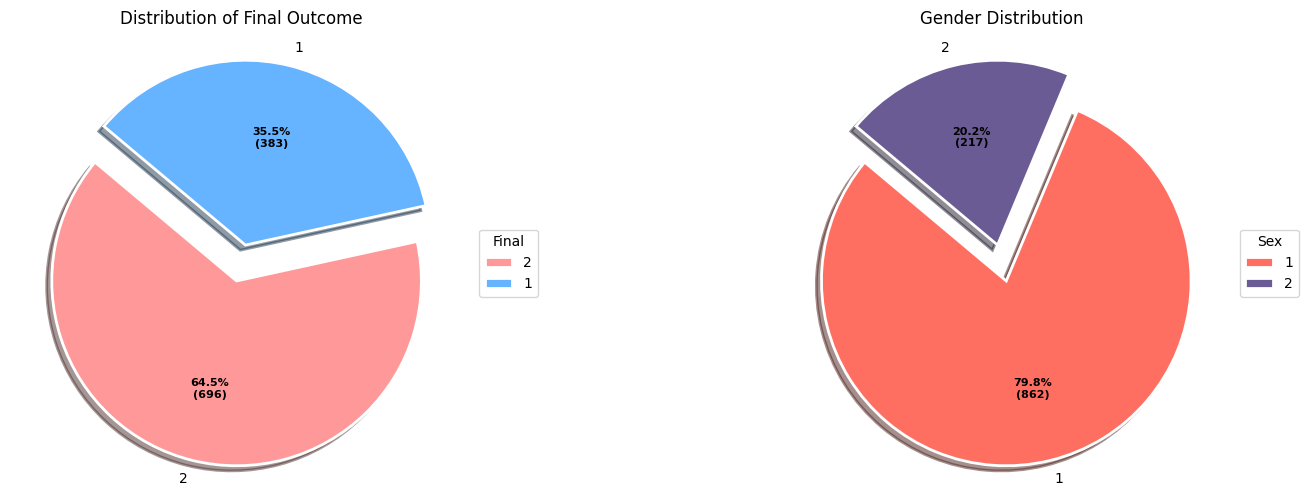

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Colors for the pie charts
colors1 = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]
colors2 = ["#FF6F61", "#6B5B95"]

# Class
wedges1, texts1, autotexts1 = axs[0].pie(imp_data['Final'].value_counts(),
                                         autopct=lambda pct: pie(pct, imp_data['Final'].value_counts()),
                                         explode=(0.1, 0.1),
                                         labels=imp_data['Final'].value_counts().index, 
                                         shadow=True, 
                                         startangle=140,  # Changed start angle for a different look
                                         wedgeprops={'linewidth': 2, 'edgecolor': 'white'},  # Changed edge color to white
                                         textprops=dict(color="black"),
                                         colors=colors1)  # Updated colors
 
# Adding legend
axs[0].legend(wedges1, imp_data['Final'].value_counts().index, title='Final',
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size=8, weight="bold")
axs[0].set_title("Distribution of Final Outcome")

# Gender
wedges2, texts2, autotexts2 = axs[1].pie(imp_data['Sex'].value_counts(),
                                         autopct=lambda pct: pie(pct, imp_data['Sex'].value_counts()),
                                         explode=(0.1, 0.1),
                                         labels=imp_data['Sex'].value_counts().index, 
                                         shadow=True, 
                                         startangle=140,  # Changed start angle for a different look
                                         wedgeprops={'linewidth': 2, 'edgecolor': 'white'},  # Changed edge color to white
                                         textprops=dict(color="black"),
                                         colors=colors2)  # Updated colors

# Adding legend
axs[1].legend(wedges2, imp_data['Sex'].value_counts().index, title='Sex',
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
 
plt.setp(autotexts2, size=8, weight="bold")
axs[1].set_title("Gender Distribution")

plt.show()


The first pie chart reveals that the response variable is somewhat imbalanced, which could potentially lead to biased predictions. However, after applying techniques like oversampling, undersampling, and SMOTE,UPSAMPLING and DOWNSAMPLING to address the imbalance, the train and test accuracies actually decreased. Given this outcome and considering that the imbalance is not severe, it may be more prudent to proceed without balancing the data.

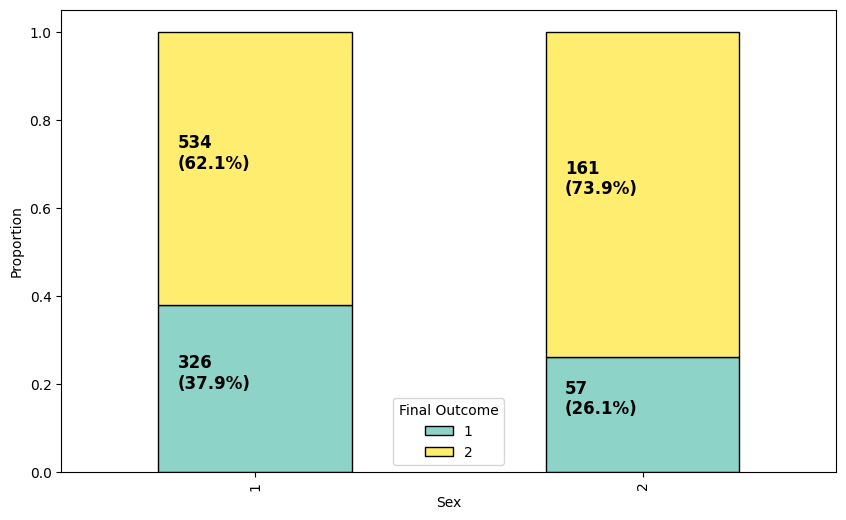

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
cross_tab_prop = pd.crosstab(index=data['Sex'],
                             columns=data['Final'],
                             normalize="index")

cross_tab = pd.crosstab(index=data['Sex'],
                        columns=data['Final'])

# Plot with custom colors
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set3',  # Changed colormap to 'Set3' for a different color scheme
                    edgecolor='black',  # Added edge color to make bars more distinct
                    figsize=(10, 6))

plt.legend(title='Final Outcome')
plt.xlabel("Sex")
plt.ylabel("Proportion")

# Adding proportion and count annotations
for n, x in enumerate(cross_tab.index.values):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.2,  # Adjusted for better placement
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
plt.show()


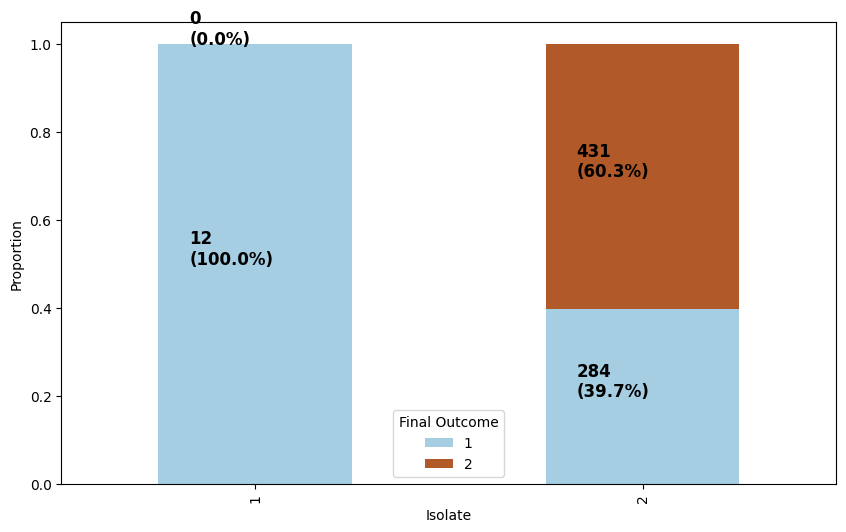

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
cross_tab_prop = pd.crosstab(index=data['Isolate'],
                             columns=data['Final'],
                             normalize="index")

cross_tab = pd.crosstab(index=data['Isolate'],
                        columns=data['Final'])

# Plot with custom colors
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Paired',  # Changed colormap to 'Paired' for a distinct color scheme
                    figsize=(10, 6))

plt.legend(title='Final Outcome')
plt.xlabel("Isolate")
plt.ylabel("Proportion")

# Adding proportion and count annotations
for n, x in enumerate(cross_tab.index.values):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
plt.show()


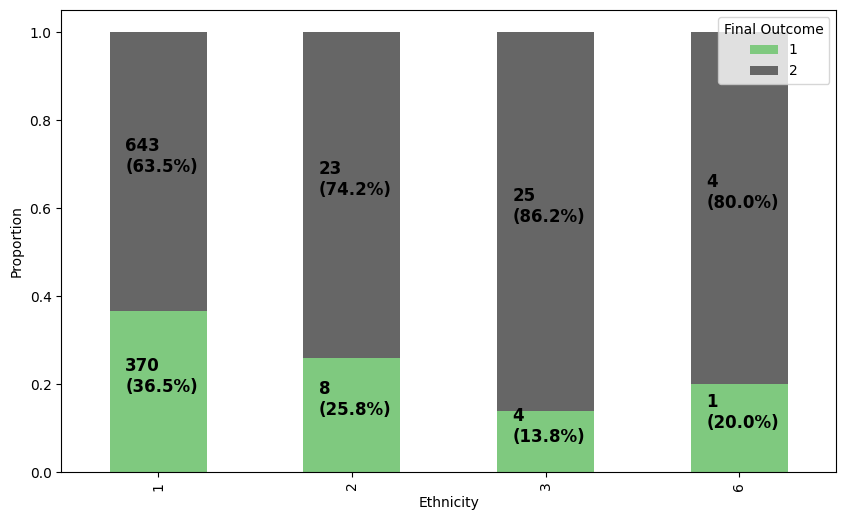

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
cross_tab_prop = pd.crosstab(index=data['Ethnicity'],
                             columns=data['Final'],
                             normalize="index")

cross_tab = pd.crosstab(index=data['Ethnicity'],
                        columns=data['Final'])

# Plot with custom colors
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent',  # Changed colormap to 'Accent' for a different color scheme
                    figsize=(10, 6))

plt.legend(title='Final Outcome')
plt.xlabel("Ethnicity")
plt.ylabel("Proportion")

# Adding proportion and count annotations
for n, x in enumerate(cross_tab.index.values):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
plt.show()


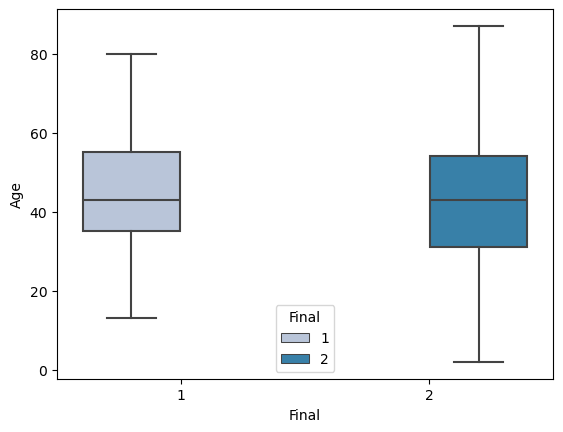

In [107]:
import seaborn as sns
var = 'Age'
sns.boxplot(x='Final', y=var, data=imp_data, hue='Final',palette='PuBu')
plt.show()


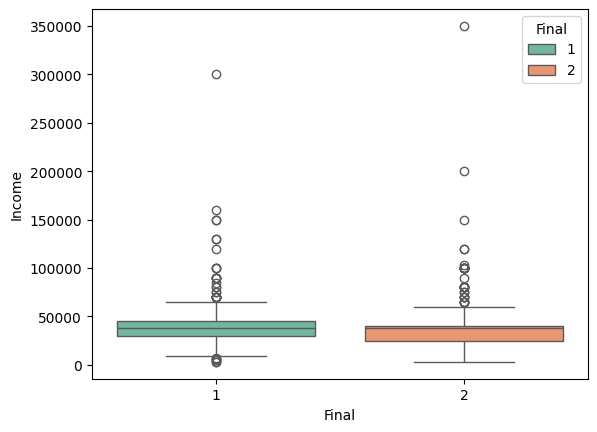

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'Income'

# Create a boxplot with a different color palette
sns.boxplot(x='Final', y=var, data=imp_data, hue='Final', palette='Set2')  # Changed palette to 'Set2'
plt.show()


can see some outliers in the above boxplot

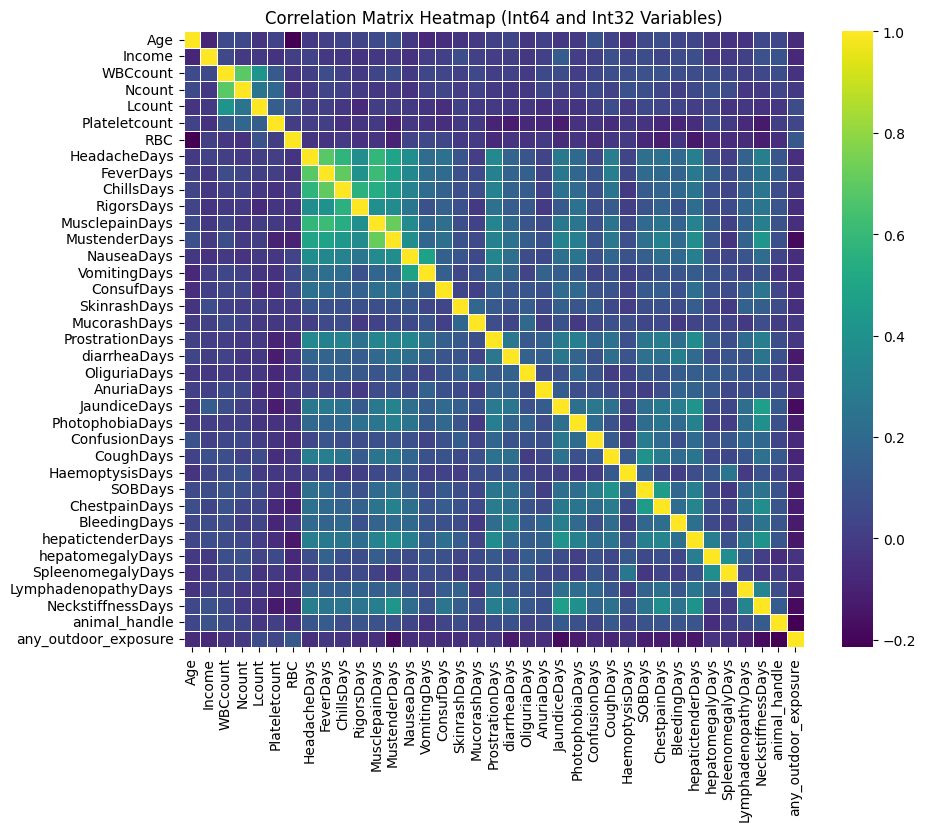

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Int64 and Int32 variables
int_vars = imp_data.select_dtypes(include=['Int64', 'Int32', 'float64'])

# Compute the correlation matrix for integer variables
correlation_matrix = int_vars.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis', linewidths=0.5)  # Changed colormap to 'viridis'
plt.title('Correlation Matrix Heatmap (Int64 and Int32 Variables)')
plt.show()


In [110]:
import numpy as np

# Filter Int64 and Int32 variables
int_vars = imp_data.select_dtypes(include=['Int64', 'Int32','float64'])

# Compute the correlation matrix for integer variables
correlation_matrix = int_vars.corr()

# Set the correlation threshold
correlation_threshold = 0.7

# Find variable pairs with correlation above the threshold
correlation_pairs = np.where((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold))

# Create a dictionary to store the sets of variables with higher correlation
higher_corr_sets = {}

# Iterate over the pairs of correlated variables
for i, j in zip(*correlation_pairs):
    # Check if the variables are not identical and form a new set
    if i != j:
        # Check if the set is not already in the higher_corr_sets dictionary
        if i not in higher_corr_sets:
            higher_corr_sets[i] = set()
        if j not in higher_corr_sets:
            higher_corr_sets[j] = set()

        higher_corr_sets[i].add(int_vars.columns[j])
        higher_corr_sets[j].add(int_vars.columns[i])

# Print the higher correlation sets
for variable, correlated_vars in higher_corr_sets.items():
    print(f"Higher Correlation Set for Variable {int_vars.columns[variable]}:")
    print(correlated_vars)
    print()


Higher Correlation Set for Variable FeverDays:
{'ChillsDays'}

Higher Correlation Set for Variable ChillsDays:
{'FeverDays'}

Higher Correlation Set for Variable MusclepainDays:
{'MustenderDays'}

Higher Correlation Set for Variable MustenderDays:
{'MusclepainDays'}



There are some strong negative correlations between variables as above output, indicating the sign of multicolinearity among predictor variables. 

Multicollinearity can affect the overall performance of the logistic regression model. It can lead to overfitting or unstable predictions, making the model less reliable in terms of generalization to new data.


To mitigate multicollinearity in logistic regression,

        we can remove one or more highly correlated predictors from the model or
        can use Regularization techniques such as ridge regression or lasso regression, which can help in shrinking or eliminating the impact of correlated predictors.(the accuracies got reduced)

In [111]:
# Create a list to store the column names of highly correlated predictors to remove
predictors_to_remove = []

# Iterate over the higher correlation sets
for variable, correlated_vars in higher_corr_sets.items():
    # Add the correlated variables to the list of predictors to remove
    predictors_to_remove.extend(correlated_vars)

# Remove the highly correlated predictors from X
filtered_data = imp_data.drop(columns=predictors_to_remove)

# Print the updated X
print(filtered_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1386
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       1080 non-null   category
 1   Month                      1080 non-null   category
 2   Hospital                   1080 non-null   category
 3   Sample                     1080 non-null   category
 4   ICU                        1080 non-null   category
 5   OPD                        1080 non-null   category
 6   Sex                        1080 non-null   category
 7   Age                        1080 non-null   int32   
 8   Ethnicity                  1080 non-null   category
 9   Income                     1080 non-null   float64 
 10  Education                  1080 non-null   category
 11  TertiaryEducation          1080 non-null   category
 12  Prophylactics              1080 non-null   category
 13  Pasttreatments             1080 non-nu

# b) Model Building

In [112]:
X = filtered_data.loc[:,filtered_data.columns!= 'Final']
y= filtered_data['Final']
X.head()

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,Income,...,SOBDays,ChestpainDays,BleedingDays,hepatictenderDays,hepatomegalyDays,SpleenomegalyDays,LymphadenopathyDays,NeckstiffnessDays,animal_handle,any_outdoor_exposure
0,2018,11,7,1,2,2,2,53,1,35000.000000,...,0,0,4,10,0,0,0,0,2,1
1,2018,1,7,1,2,2,1,17,1,38212.663082,...,0,0,0,5,0,0,0,0,2,1
2,2018,5,7,1,2,2,1,47,1,40000.000000,...,0,0,0,0,0,0,0,4,2,1
3,2018,1,7,1,2,2,1,21,1,30000.000000,...,0,0,0,0,0,0,0,0,2,1
4,2016,8,7,1,2,1,1,43,1,38212.663082,...,0,0,0,0,0,0,0,0,2,1


In [113]:
print(y)
y.isnull().sum()

0       2
1       1
2       2
3       2
4       2
       ..
1379    2
1381    1
1383    2
1384    2
1386    1
Name: Final, Length: 1080, dtype: category
Categories (2, Int64): [1, 2]


0

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include='category').columns.tolist()
numeric_cols = X.select_dtypes(include=['Int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#print(y_encoded)

#apply Logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


model.fit(X,y_encoded)
train_pred = model.predict(X)
train_acc = accuracy_score(y_encoded, train_pred)
print(f'Training Accuracy: {train_acc:.4f}')

Training Accuracy: 0.8935


### test data

In [115]:
testdata = pd.read_csv('test.csv')


In [116]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
testdata.rename(columns = col_names, inplace=True)

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = testdata[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  testdata[col+'Days'] = df['Days']
  testdata.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [117]:
#'Psychoticsymptoms'
col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
testdata.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = testdata[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  testdata[col+'Days'] = df['Days']
  testdata.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [118]:
testdata = testdata.drop('ID', axis=1)
testdata = testdata.replace(99, np.nan)
testdata.isna().sum()

Year                    0
Month                   0
Hospital                0
Sample                  0
ICU                    19
                       ..
hepatictenderDays      89
hepatomegalyDays       88
SpleenomegalyDays      89
LymphadenopathyDays    89
NeckstiffnessDays      85
Length: 529, dtype: int64

In [119]:
# Assuming data is your DataFrame
testdata = testdata.replace('[a-zA-Z]+', np.nan, regex=True)
testdata = testdata.replace(' ', np.nan)
testdata = testdata.fillna(99)  # Replace missing values with 0
testdata = testdata.astype(np.float64).astype(int)
testdata = testdata.astype(int)
testdata[testdata == 99] = pd.NA

In [120]:
selected_cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
                 'WorkplaceStreamrivercanaloranyotherrunningwatersource',
                 'Homepondlaketankoranyotherstagnantwatersource',
                 'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
water_source = testdata[selected_cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

testdata['water_source'] = water_source.apply(water_area, axis=1)

testdata.drop(selected_cols, axis=1, inplace=True)


In [121]:
animal1 = ['Rat', 'Dog', 'Cattle']

for col in animal1:
  testdata[col] =testdata[col + 'home'] +testdata[col + 'Workplace'] + testdata[col + 'Neighbourhood']

testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 529 entries, Year to Cattle
dtypes: float64(523), int32(5), object(1)
memory usage: 1.4+ MB


In [122]:
testdata['urumeeya'] = testdata['Urumeeyahome'] + testdata['Urumeeyaworkplace'] + testdata['UrimeeyaNeighbourhood']
testdata['otherRhodents'] = testdata['OtherrhodentsHome'] + testdata['OtherRhoddentsWorkplace'] + testdata['OtherRhodentsNeighbourhood']

testdata.drop(['UrimeeyaNeighbourhood','Urumeeyahome','Urumeeyaworkplace', 'OtherrhodentsHome', 'OtherRhoddentsWorkplace', 'OtherRhodentsNeighbourhood'], axis = 1, inplace=True)

In [123]:
    
animal3 = ['Pig','Goat']
for col3 in animal3:
    testdata[col3] = testdata[col3 + 'Home'] +testdata[col3 + 'Workplace'] + testdata[col3 + 'Neighbourhood']
  
testdata.drop(['Rathome','RatWorkplace','RatNeighbourhood','Cathome','Catworkplace',
           'CatNeighbourhood','Doghome','DogWorkplace','DogNeighbourhood',
           'Cattlehome','CattleWorkplace','CattleNeighbourhood','PigHome',
           'PigWorkplace','PigNeighbourhood','GoatHome','GoatWorkplace',
           'GoatNeighbourhood'], axis = 1, inplace = True)


In [124]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 509 entries, Year to Goat
dtypes: float64(503), int32(5), object(1)
memory usage: 1.3+ MB


In [125]:
testdata = testdata.drop(columns_to_drop_1, axis=1)

In [126]:
testdata = testdata.rename(columns={'CattleHandle':'handleCattle','BuffaloHandle':'handleBuffalo','Goathandle':'handleGoat','Pighandle':'handlePig','Doghandle':'handleDog','Cathandle':'handleCat'})


In [127]:
animal = ['Cattle', 'Buffalo', 'Goat', 'Pig', 'Cat', 'Dog']
animal_handle = testdata[['handle' + col for col in animal]]

def handle(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

testdata['animal_handle'] = animal_handle.apply(handle, axis=1)

testdata.drop(['handle' + col for col in animal], axis=1, inplace=True)


In [128]:
testdata = testdata.rename(columns={'BushesExposure': 'Bushesexposure'})

outdoor = ['Marshland', 'Wetsoil', 'Flood', 'Forest', 'Bushes', 'Otheragri', 'Gardening',
           'Otheroutdoorwork', 'Naturalrunningwater', 'Stagnantwater', 'Manmaderunningwater',
           'Drains', 'Otherwater', 'Paddyfield']

any_outdoor_exposure = testdata[[col + 'exposure' for col in outdoor]]

def exposure(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

testdata['any_outdoor_exposure'] = any_outdoor_exposure.apply(exposure, axis=1)

testdata.drop([col + 'exposure' for col in outdoor], axis=1, inplace=True)


In [129]:
#Dont know whether 99 is NA or actual value
drop_cols = ['PRad','SBPadd','DBPadd','N','L','PCV','Na','K','AST','ALT','S.creatinine','WBC_first_day']
testdata.drop(drop_cols, axis=1, inplace=True)

#all entries are 1--> no variation
testdata = testdata.drop('MAT_set_1', axis=1)

#isolate var has 98 as missing values
testdata['Isolate'] = testdata['Isolate'].replace(98, np.nan)


In [130]:
testdata = testdata.astype('Int64')
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       347 non-null    Int64
 1   Month                      347 non-null    Int64
 2   Hospital                   347 non-null    Int64
 3   Sample                     347 non-null    Int64
 4   ICU                        328 non-null    Int64
 5   OPD                        328 non-null    Int64
 6   Sex                        312 non-null    Int64
 7   Age                        304 non-null    Int64
 8   Ethnicity                  312 non-null    Int64
 9   Income                     231 non-null    Int64
 10  Education                  257 non-null    Int64
 11  TertiaryEducation          257 non-null    Int64
 12  Prophylactics              269 non-null    Int64
 13  Pasttreatments             272 non-null    Int64
 14  Pastantibiotics           

In [131]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','Usualdrinkingwatersource','Usualbathingwatersource',
                         'Sourceofwaterforhousehold','Garbagedisposalprocedure','Accumilationofrefusal']

testdata[cat_columns_to_convert] =testdata[cat_columns_to_convert].astype('Int64')
testdata[cat_columns_to_convert] = testdata[cat_columns_to_convert].astype('category')

num1_columns_to_convert = ['Age','Income']
testdata[num1_columns_to_convert] = testdata[num1_columns_to_convert].astype('Int64')

num_columns_to_convert  = testdata.columns[data.columns.get_loc('WBCcount'):] #columns starting from 'WBCcount' and onwards.
testdata[num_columns_to_convert] = testdata[num_columns_to_convert].astype('Int64')


cat1_columns_to_convert = ['WPqPCRDiagnosis','UrineqPCRDiagnosis','Isolate']
testdata[cat1_columns_to_convert] = testdata[cat1_columns_to_convert].astype('category')



# c) Predictions for Final for the test data

In [132]:
imp_testdata = testdata.copy()

from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the 'income' column and transform the testdata
imp_testdata['Income'] = imputer.fit_transform(imp_testdata[['Income']])

imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the testdata and transform the 'age' column
imp_testdata['Age'] = imputer.fit_transform(imp_testdata[['Age']])
# Round the imputed values to the nearest integer
imp_testdata['Age'] = imp_testdata['Age'].round().astype(int)


categorical_columns = testdata.select_dtypes(include='category').columns.tolist()
int64_columns = testdata.select_dtypes(include='Int64').columns.tolist()

testdata_imputed = imp_testdata[categorical_columns + int64_columns].fillna(imp_testdata[categorical_columns + int64_columns].mode().iloc[0])

# Update the original testdataframe with the imputed values
imp_testdata[categorical_columns + int64_columns] = testdata_imputed

y_test_pred_labeled = model.predict(imp_testdata)
y_test_pred =y_test_pred_labeled+1
print(y_test_pred)

[1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1
 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 1
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 2 1 1 2 2 2 1 2 1 2 2 1 2]


In [137]:
sample = pd.read_csv('sample_submission.csv')

In [138]:
imp_testdata

,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,Income,...,ChestpainDays,BleedingDays,hepatictenderDays,hepatomegalyDays,SpleenomegalyDays,LymphadenopathyDays,NeckstiffnessDays,animal_handle,any_outdoor_exposure,Final
0,2017,6,1,1,2,2,1,49,1,20000.000000,...,0,0,0,0,0,6,6,2,1,1
1,2017,6,1,1,2,2,1,47,1,32000.000000,...,0,0,0,0,0,0,0,2,1,2
2,2017,6,1,1,2,2,1,51,1,30000.000000,...,0,0,0,0,0,0,0,2,1,2
3,2017,6,1,1,2,2,2,37,1,22000.000000,...,0,0,0,0,0,0,0,2,1,2
4,2017,6,1,1,2,1,1,45,1,41140.692641,...,0,0,0,0,0,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2017,10,8,1,2,2,1,27,1,30000.000000,...,0,0,0,0,0,0,0,2,1,1
343,2017,10,8,1,2,2,1,77,1,41140.692641,...,0,0,0,0,0,0,0,2,2,2
344,2017,10,8,1,2,2,1,37,1,50000.000000,...,0,0,0,0,0,0,0,2,2,2
345,2017,11,8,1,2,2,1,32,1,30000.000000,...,0,0,0,0,0,0,0,2,2,1


In [139]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_pred, sample['Final'])
print("Accuracy:", accuracy)

Accuracy: 0.8904899135446686


In [140]:
imp_testdata['Final'] =y_test_pred
# Select the two columns you want to concatenate
column1 = sample['ID']
column2 = imp_testdata['Final']

# Concatenate the columns into a new dataframe
new_df = pd.concat([column1,column2], axis=1)

# Print the new dataframe
print(new_df.head())
new_df.info()


   ID  Final
0   1      1
1   2      2
2   3      2
3   4      2
4   5      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      347 non-null    int64
 1   Final   347 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 4.2 KB


In [141]:
new_df.to_csv("Model_9.csv", index = False)